In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [8]:
# Task 1
def generate_data(alfa,b,k,n):
    X=np.random.multivariate_normal(np.zeros(5+k),np.eye(5+k),n)
    betha=np.array(([b]*5+[0]*k)).reshape(-1,1)
    P=1/(1+np.exp(-(alfa+X@betha)))
    y=np.array([np.random.binomial(1,p,1) for p in P ]).reshape(-1,1)
    return X,y

In [9]:
X,y=generate_data(alfa=2,b=1,k=20,n=1000)
tclf=DecisionTreeClassifier().fit(X,y.reshape(-1,))
lgclf=LogisticRegression().fit(X,y.reshape(-1,))

In [15]:
def task_3():
    X,y=generate_data(alfa=2,b=1,k=20,n=1000)
    y=y.reshape(-1,)
    tclf=DecisionTreeClassifier().fit(X,y)
    
    lgclf=LogisticRegression().fit(X,y)
    # a)
    print("Reffiting")
    print(f"error for classification tree: {(tclf.predict(X)!=y).mean()}")
    print(f"error for logistic regression: {(lgclf.predict(X)!=y).mean()}")
    
    # b)
    cv_split=KFold(n_splits=10)
    t_error_cv=np.zeros(10)
    lg_error_cv=np.zeros(10)
    for i,(train_index, test_index) in enumerate(cv_split.split(X)):
        X_train=X[train_index]
        y_train=y[train_index]
        X_test=X[test_index]
        y_test=y[test_index]
        tclf.fit(X_train,y_train)
        lgclf.fit(X_train,y_train)
        t_error_cv[i]=(tclf.predict(X_test)!=y_test).mean()
        lg_error_cv[i]=(lgclf.predict(X_test)!=y_test).mean()
    print("Cross-validation")
    print(f"error for classification tree: {t_error_cv.mean()}")
    print(f"error for logistic regression: {lg_error_cv.mean()}")
    
    # c)
    m=10
    n=1000
    t_error_bs_opt=np.zeros(m)
    lg_error_bs_opt=np.zeros(m)
    t_err_bs_nom=np.zeros(n)
    t_err_bs_denom=np.zeros(n)
    lg_err_bs_nom=np.zeros(n)
    lg_err_bs_denom=np.zeros(n)
    for i in range(m):
        idxs=np.random.choice(1000,1000,replace=True)
        not_in=np.array([i for i in range(1000) if i not in idxs])
        X_train=X[idxs]
        y_train=y[idxs]
        X_test=X[not_in]
        y_test=y[not_in]
        tclf.fit(X_train,y_train)
        lgclf.fit(X_train,y_train)
        lg_err_bs_denom[not_in]+=1
        t_err_bs_denom[not_in]+=1
        t_err_bs_nom[not_in]+=(tclf.predict(X_test)!=y_test)
        lg_err_bs_nom[not_in]+=(lgclf.predict(X_test)!=y_test)
        t_error_bs_opt[i]=(tclf.predict(X)!=y).mean()
        lg_error_bs_opt[i]=(lgclf.predict(X)!=y).mean()
    
    # c)
    idx=t_err_bs_denom>0
    t_error_bs=t_err_bs_nom[idx]/t_err_bs_denom[idx]
    idx=lg_err_bs_denom>0
    lg_error_bs=lg_err_bs_nom[idx]/lg_err_bs_denom[idx]
    print("Bootstrap")
    print(f"error for classification tree: {t_error_bs.mean()}")
    print(f"error for logistic regression: {lg_error_bs.mean()}")
    
    # d)
    print("Bootstrap 0.632")
    print(f"error for classification tree: {0.632*t_error_bs.mean()+0.368*t_error_bs_opt.mean()}")
    print(f"error for logistic regression: {0.632*lg_error_bs.mean()+0.368*t_error_bs_opt.mean()}")
    
    

In [16]:
task_3()

Reffiting
error for classification tree: 0.0
error for logistic regression: 0.157
Cross-validation
error for classification tree: 0.27399999999999997
error for logistic regression: 0.17099999999999999
Bootstrap
error for classification tree: 0.28472782258064516
error for logistic regression: 0.17318788402457755
Bootstrap 0.632
error for classification tree: 0.21925038387096774
error for logistic regression: 0.14875714270353302


In [97]:
def task4(model,n,b,k,alfa):
    
    def tpr(y_true,y_pred):
        P=np.sum(y_true)
        TP=np.sum(y_true*y_pred)
        return TP/P
    def fpr(y_true,y_pred):
        N=np.sum(1-y_true)
        FP=np.sum((1-y_true)*y_pred)
        return FP/N
    def precision(y_true,y_pred):
        TP=np.sum(y_true*y_pred)
        TP_FP=np.sum(y_pred)
        if TP_FP==0:
            return 0
        return TP/TP_FP
    
    X,y=generate_data(alfa=alfa,b=b,k=k,n=n)
    y=y.reshape(-1,)
    model.fit(X,y)
    th=np.linspace(0,1,100)
    tpr_seq=np.zeros(100)
    fpr_seq=np.zeros(100)
    precision_seq=np.zeros(100)
    for i,t in enumerate(th):
        P=model.predict_proba(X)[:,1]
        y_pred=np.where(P>t,1,0)
        tpr_seq[i]=tpr(y,y_pred)
        fpr_seq[i]=fpr(y,y_pred)
        precision_seq[i]=precision(y,y_pred)
    print(f"plots for {model}")
    plt.plot(fpr_seq,tpr_seq,label="ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    plt.plot(tpr_seq,precision_seq,label="Precision-recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

plots for LogisticRegression()


C:\Users\18pep\AppData\Local\Temp\ipykernel_4376\4259370064.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return TP/TP_FP


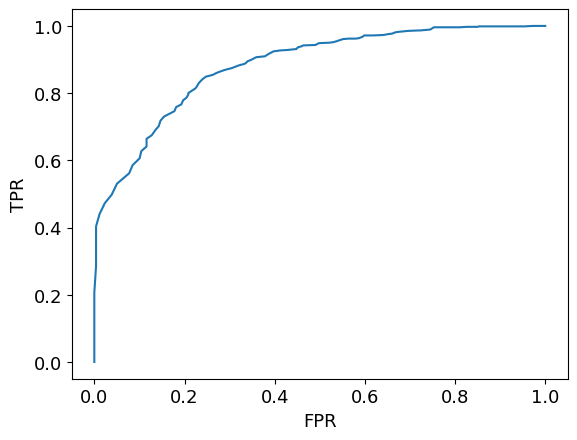

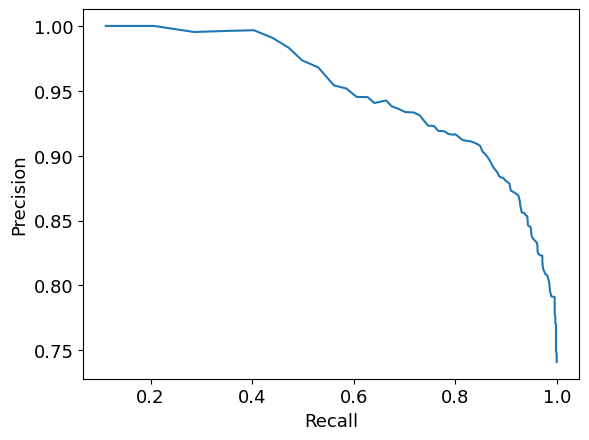

In [98]:
task4(LogisticRegression(),1000,1,5,2)

array([1., 2., 2., 2., 1.])

In [95]:
str(LogisticRegression())

'LogisticRegression()'

In [26]:
def task_5():
    X,y=generate_data(alfa=2,b=1,k=5,n=1000)
    y=y.reshape(-1,)
    X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=42)
    
    model = LogisticRegression()
    model.fit(X1,y1)
    prob2 = model.predict_proba(X2)[:,1]
    
    acc = np.zeros(200)
    bacc = np.zeros(200)
    t_seq = np.linspace(start=0, stop=1, num=200)
    
    k = 0
    for t in t_seq:
    
        y2_pred = np.where(prob2>t,1,0)
    
        acc[k] = accuracy_score(y2, y2_pred)
        bacc[k] = balanced_accuracy_score(y2, y2_pred)
        k= k+1
    
    
    plt.style.use('default')
    plt.rcParams.update({'font.size': 13})
    plt.plot(t_seq, acc, color="r",label="Accuracy",linewidth=3)
    plt.plot(t_seq, bacc, color="b",label="Balanced accuracy",linewidth=3)
    plt.axvline(x = 0.5, color = 'r', label = 'Optimal thr for accuracy',linestyle='dashed',linewidth=3)
    plt.axvline(x = np.mean(y1), color = 'b', label = 'Optimal thr for balanced accuracy',linestyle='dashed',linewidth=3)
    plt.legend(loc="lower center")
    plt.ylim(0,1)
    plt.grid(which="both")



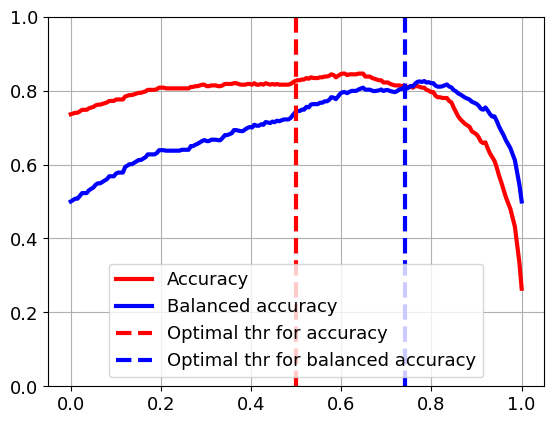

In [27]:
task_5()